# Multiple Linear Regression
## Car Value Prediction

#### Problem Statement:

Consider a data set of car with details of car, model, car body, dimension and so on. 
We are required to evaluate the driving forces behind the price of the car.

Essentially, the company wants —

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
cardata = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
cardata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the car dataframe

In [5]:
#There are 205 rows and 26 columns
cardata.shape

(205, 26)

In [6]:
#Find the metadata of the car data frame
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
#Find the statistics of the car data frame
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
#check for missing values
#we concluded that there are no columns having missing values
cardata.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
#extract car company name from column CarName
#create new columns "brand" & "model" and then drop carName column
cardata["CarName"] = cardata.CarName.apply(lambda x: x.split(" "))
cardata["brand"] = cardata.CarName.apply(lambda x: x[0])
cardata["model"] = cardata.CarName.apply(lambda x: x[-1])
cardata = cardata.drop(["CarName"],axis=1)

In [10]:
#recheck whether new columns have been added correctly
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [12]:
#analysis of general characteristics of the data
details = rstr(cardata, 'price')
display(details.sort_values(by='corr price', ascending=False))

Data shape: (205, 27)
___________________________
Data types:
 object     11
float64     8
int64       8
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr price
price,float64,205,189,0,0.0,"[[13495.0, 16500.0, 13950.0, 17450.0, 15250.0,...",1.777678,3.051648,1.000000
enginesize,int64,205,44,0,0.0,"[[130, 152, 109, 136, 131, 108, 164, 209, 61, ...",1.947655,5.305682,0.874145
curbweight,int64,205,171,0,0.0,"[[2548, 2823, 2337, 2824, 2507, 2844, 2954, 30...",0.681398,-0.042854,0.835305
horsepower,int64,205,59,0,0.0,"[[111, 154, 102, 115, 110, 140, 160, 101, 121,...",1.405310,2.684006,0.808139
carwidth,float64,205,44,0,0.0,"[[64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64...",0.904003,0.702764,0.759325
carlength,float64,205,75,0,0.0,"[[168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 17...",0.155954,-0.082895,0.682920
wheelbase,float64,205,53,0,0.0,"[[88.6, 94.5, 99.8, 99.4, 105.8, 99.5, 101.2, ...",1.050214,1.017039,0.577816
boreratio,float64,205,38,0,0.0,"[[3.47, 2.68, 3.19, 3.13, 3.5, 3.31, 3.62, 2.9...",0.020156,-0.785042,0.553173
carheight,float64,205,49,0,0.0,"[[48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53...",0.063123,-0.443812,0.119336
stroke,float64,205,37,0,0.0,"[[2.68, 3.47, 3.4, 2.8, 3.19, 3.39, 3.03, 3.11...",-0.689705,2.174396,0.079443


# Step 2: Visualising the Data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

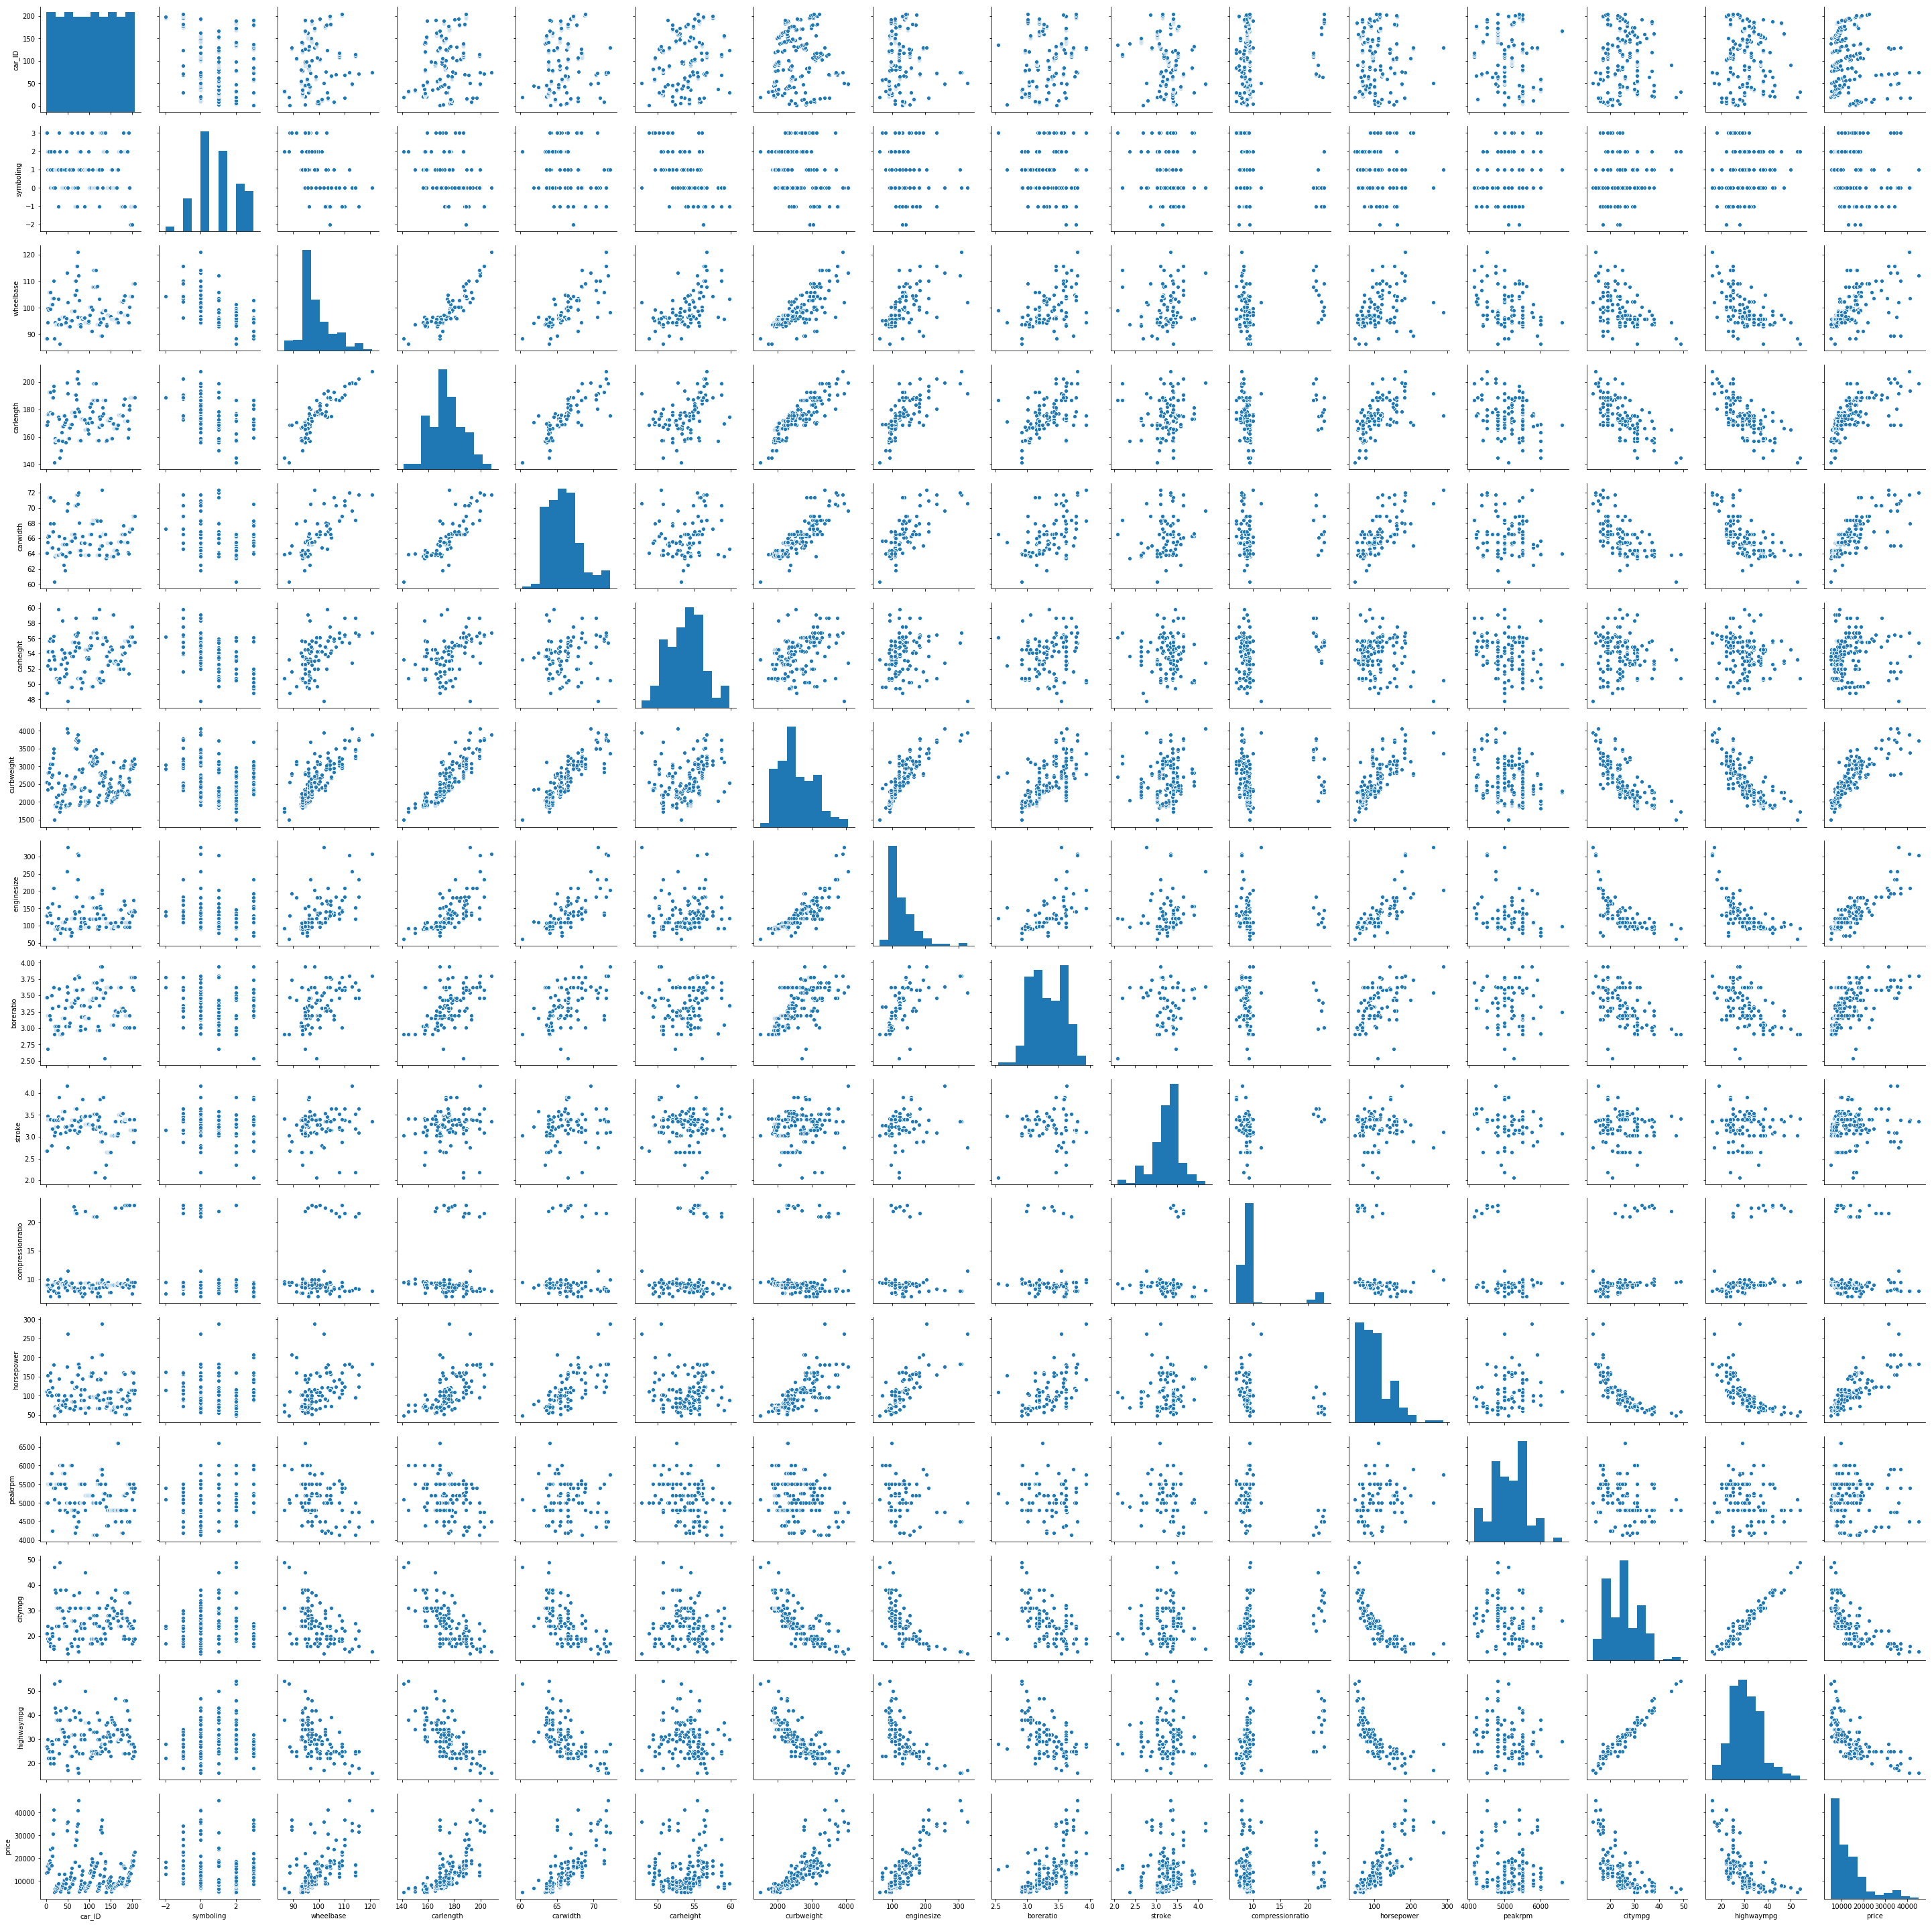

In [14]:
#from the plot, we can derive few rudimentary observations
#price appears to be positively correlated with wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
#highwaympg and citympg are strongly correlated
sns.pairplot(cardata)
plt.show()



In [15]:
#Identify the categorical variables
categorical_features = cardata.dtypes[cardata.dtypes=="object"].index
categorical_features

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand',
       'model'],
      dtype='object')

#### Visualising Categorical Variables
Let's make a boxplot for some of these variables.

C:\Users\nikhil.bhide\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


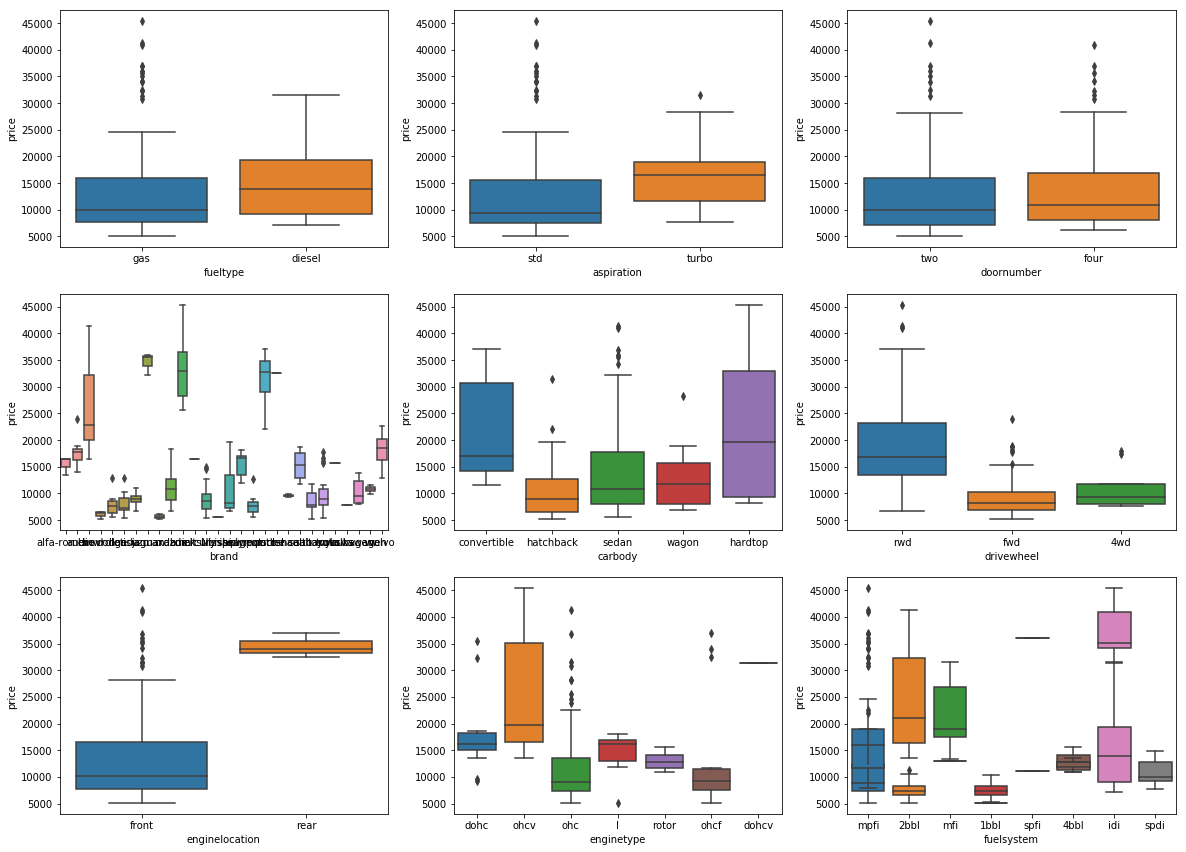

In [16]:
#we can conclude that fuel type impacts the price. Disel cars are costlier than the gas cars
#aspiration also impacts the car price. Turbo cars are costlier than standard
#door numbers do not really affect the price of the car. This is interesting as general notion is four door cars should be costlier than the two doors.
#rear engine cars are costlier than the front engine cars and generally rear engine cars have difficult configuration so in general such kind of placement of engine is more prevalent in racing cars

plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cardata)
plt.subplot(4,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cardata)
plt.subplot(4,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cardata)
plt.subplot(4,3,4)
sns.boxplot(x = 'brand', y = 'price', data = cardata)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = cardata)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardata)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardata)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = cardata)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardata)
plt.subplot(4,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardata)
plt.show()

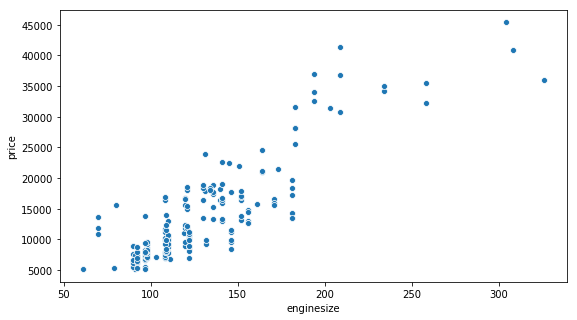

In [17]:
#correlation with engine size
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
sns.scatterplot(x = cardata.enginesize, y = cardata.price, ax = ax)
plt.show()

# Step 3: Cleaning the Data

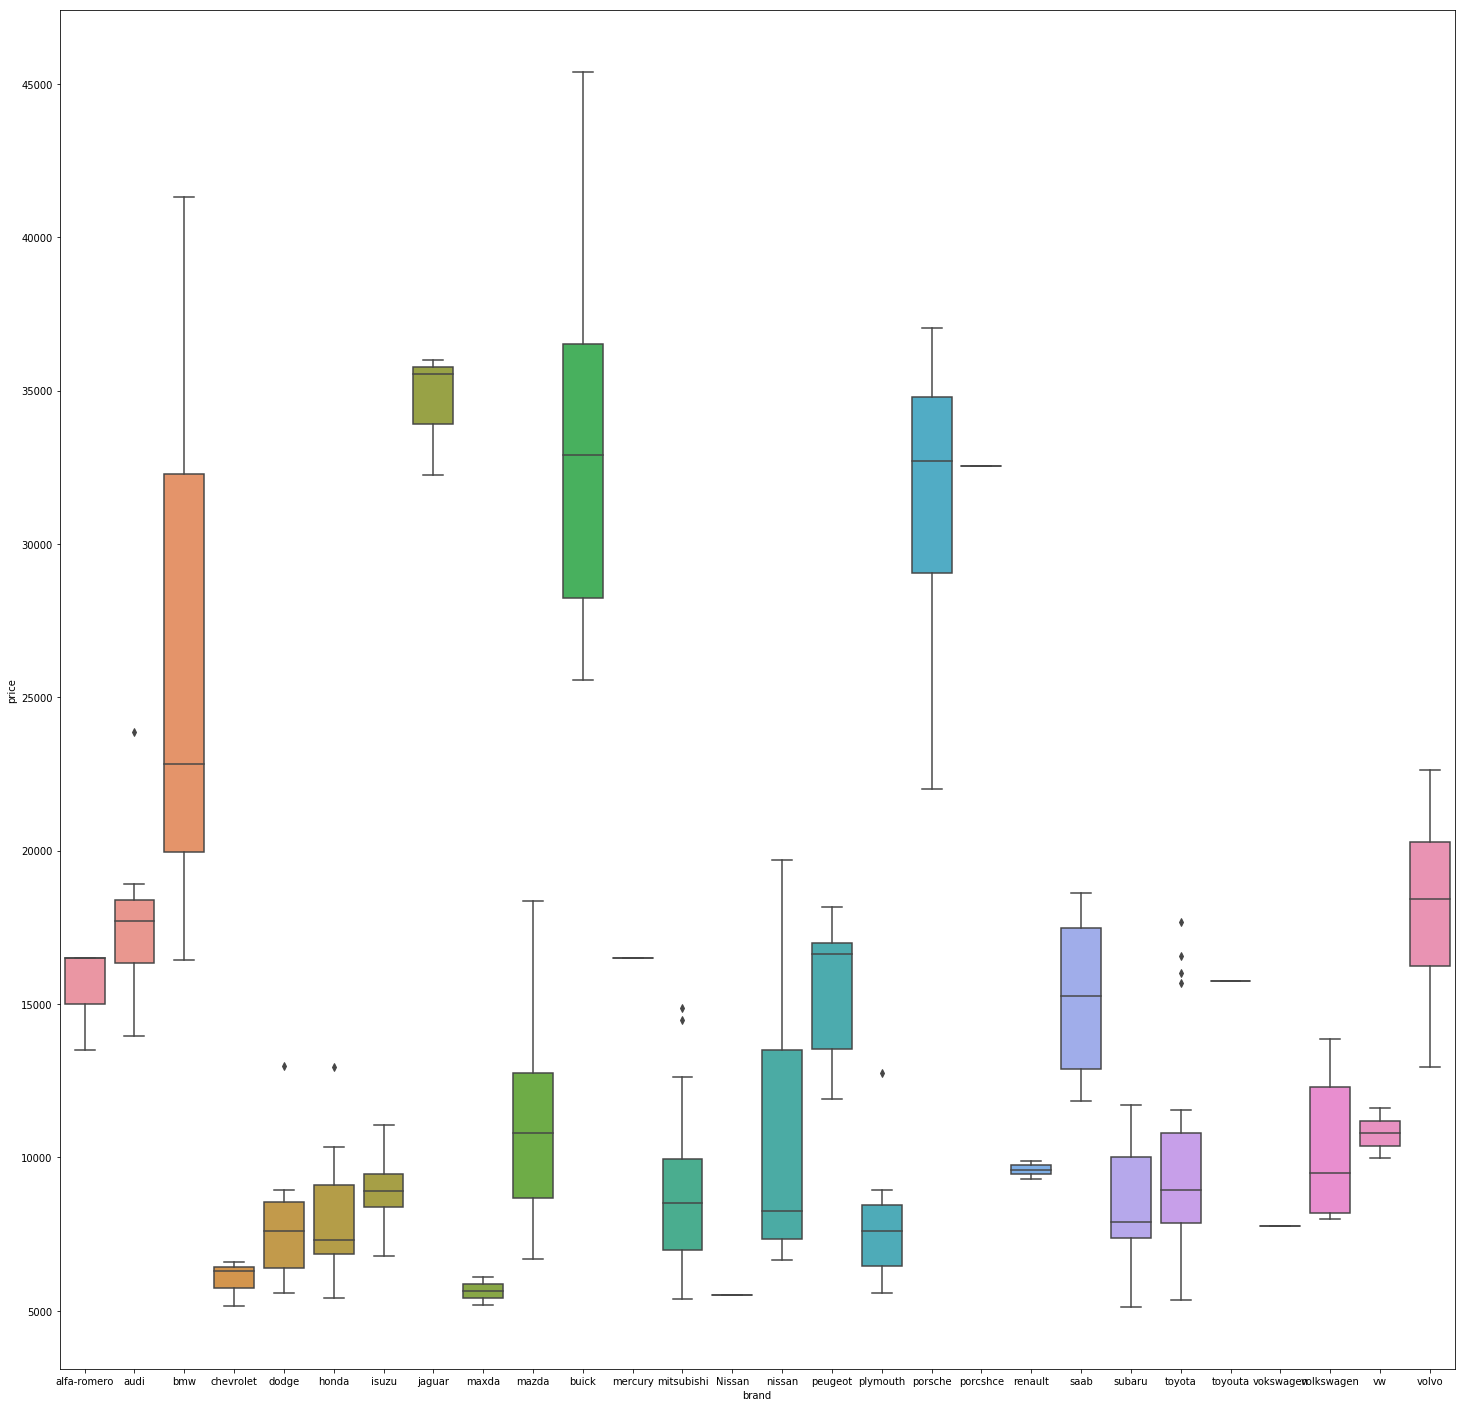

In [18]:
#we can clearly notice that cars of three brands - bmw, porsche and buick are very expensive compared to other brands' cars 
#we also concluded that there is typo in the data
#for an instance, Nissan & nissan are same, porsche & porcshce are same, toyota & toyouta, and volkswagen & vw & volkswagen
plt.figure(figsize = (25, 25))
sns.boxplot(x="brand", y="price", data=cardata)


In [19]:
cardata.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
#normalizing the brand values
cardata.brand = cardata.brand.str.replace("Nissan","nissan")
cardata.brand = cardata.brand.str.replace("porcshce","porsche")
cardata.brand = cardata.brand.str.replace("vokswagen","volkswagen")
cardata.brand = cardata.brand.str.replace("vw","volkswagen")
cardata.brand = cardata.brand.str.replace("toyouta","toyota")
cardata.brand = cardata.brand.str.replace("maxda","mazda")

#plt.figure(figsize = (10, 5))
#sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
#plt.show()

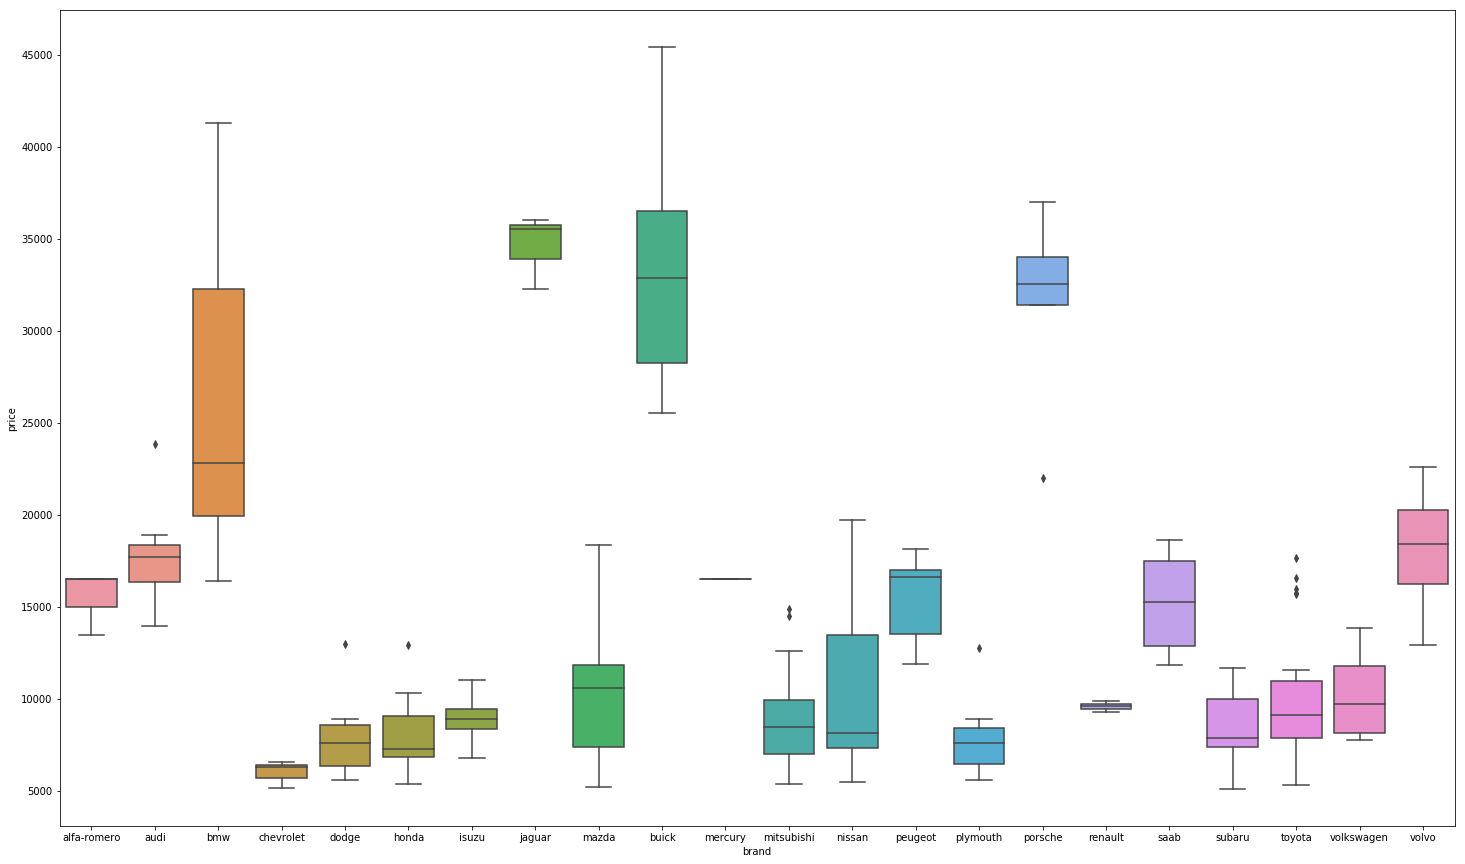

In [21]:
#plotting the brand agains price after cleaning the data
#clearly cars from brands such as buick, bmw, jaguar, porsche are expensive than others
#at the same time, price range of bmw, buick, mazda, and nissan is very dispersed.
plt.figure(figsize = (25, 15))
sns.boxplot(x="brand", y="price", data=cardata)

## Step 4: Data Preparation

- We have few categorical columns. For linear regression algorithms to work effectively we require to convert these column into numeric. We will use one hot encoding for the same. This will give us dummy variables.


In [22]:
#model is not at all having any significance so its better to drop this column
cardata = cardata.drop(["model"],axis=1)

In [23]:
#convert door number column to numeric
cardata.doornumber = cardata.doornumber.map({"two":0,"four":1})

In [24]:
# get categorical features
categorical_features = cardata.dtypes[cardata.dtypes=="object"].index
categorical_features

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem', 'brand'],
      dtype='object')

In [25]:
#Dummy variables technique for the categorical variables
for i, col_val in enumerate(categorical_features):
    tempDf = pd.get_dummies(cardata[col_val],drop_first = True)
    # Add the results to the original housing dataframe
    cardata = pd.concat([cardata, tempDf], axis = 1)
    cardata = cardata.drop([col_val],axis=1)

In [26]:
# Check the cardata dataframe
cardata.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cardata, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
#Save the 'Id' column
train_ID = df_train['car_ID']
test_ID = df_test['car_ID']

#Now drop the  'car_ID' colum since it's unnecessary for  the prediction process.
df_train.drop("car_ID", axis = 1, inplace = True)
df_test.drop("car_ID", axis = 1, inplace = True)


In [29]:
# get numeric features
numeric_features = cardata.dtypes[cardata.dtypes!="object"].index
numeric_features = numeric_features.drop("car_ID")

Rescaling the Features 
We will use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

C:\Users\nikhil.bhide\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


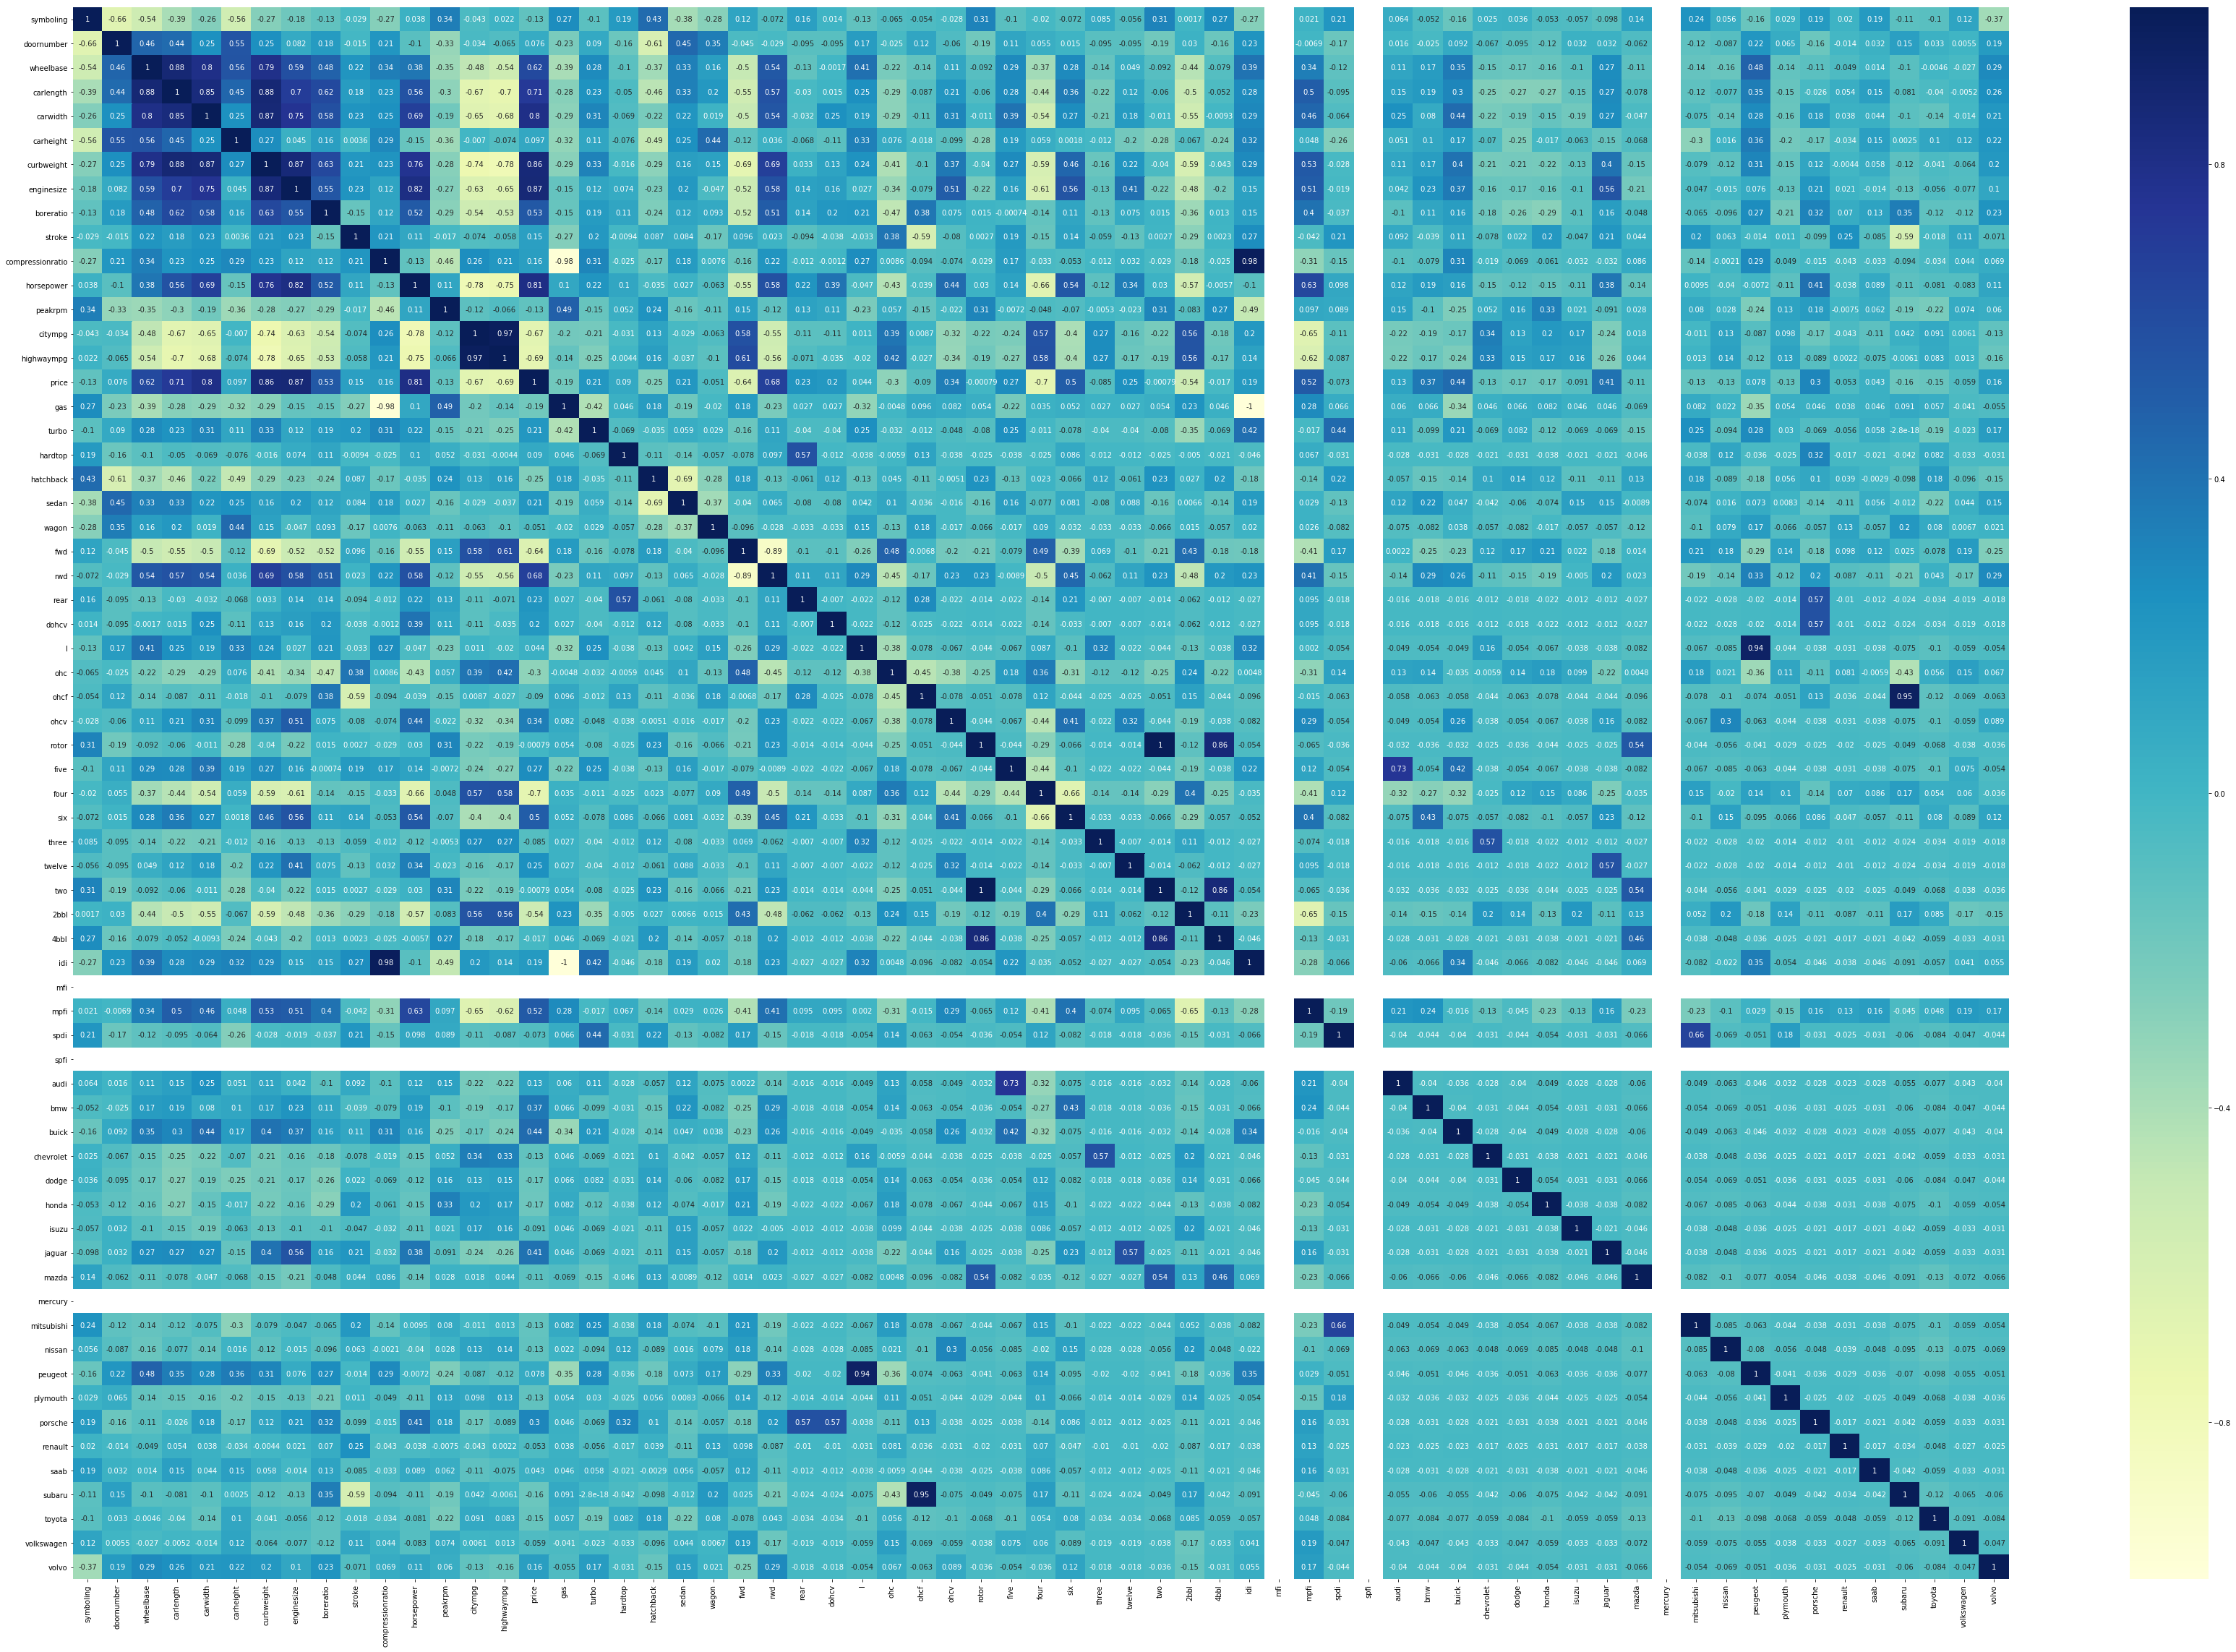

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated
# we figure out that there is only record for mercury- brand, spfi-fuelsystem and mfi-system 
plt.figure(figsize = (60, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

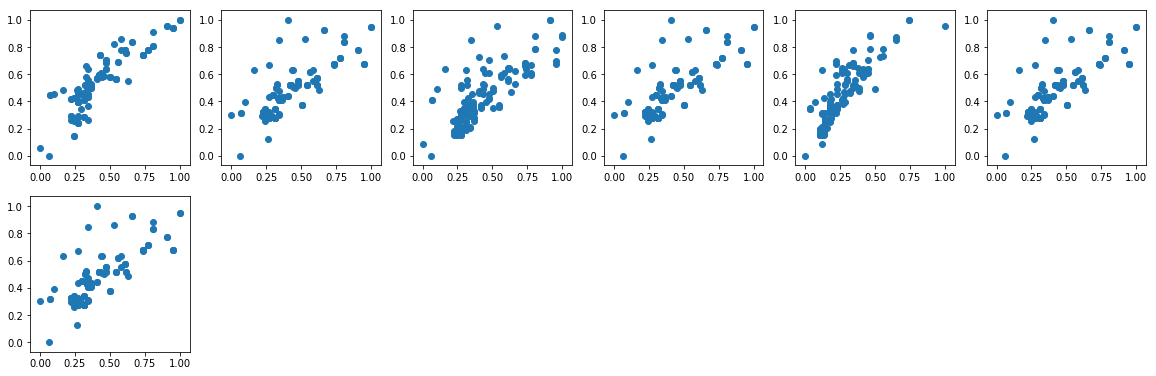

In [36]:
#wheelbase, carlength, carwidth, curbweight are highly correlated
#enginesize, curbweight are highly correlated
#we keep this information with us so that later on multicollinearity effect can be removed
plt.figure(figsize=[20,20])
plt.subplot(6,6,1)
plt.scatter(df_train.wheelbase, df_train.carlength)
plt.subplot(6,6,2)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.subplot(6,6,3)
plt.scatter(df_train.wheelbase, df_train.curbweight)
plt.subplot(6,6,4)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.subplot(6,6,5)
plt.scatter(df_train.enginesize, df_train.curbweight)
plt.subplot(6,6,6)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.subplot(6,6,7)
plt.scatter(df_train.wheelbase, df_train.carwidth)
plt.show()

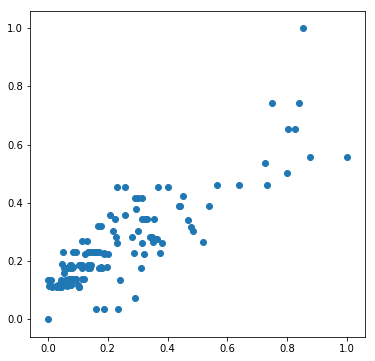

In [37]:
#We observed that `price` seems to the correlated to `enginesize` the most. Let's see a pairplot for `price` vs `enginesize`.
plt.figure(figsize=[6,6])
plt.scatter(df_train.price, df_train.enginesize)

So, we pick `enginesize` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('price')
X_train = df_train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [39]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [40]:
# Check the parameters obtained

lr.params
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.09e-44
Time:                        14:00:24   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

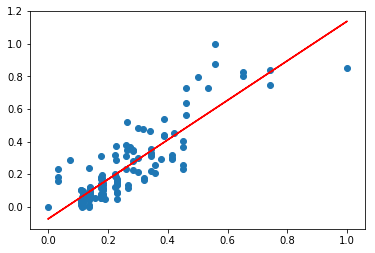

In [41]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.0729 + 1.2107*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [42]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.09e-44
Time:                        14:00:24   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### Adding another variable

The R-squared value obtained is `0.753`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `curbweight`.

In [43]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [44]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [45]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.31e-50
Time:                        14:00:24   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.753` from `0.802`. AIC and BIC values are also diminished and difference between R-squared and adjusted R-squared is small.
Let's go ahead and add another variable, `horsepower`.

In [46]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight','horsepower']]

In [47]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.126942
enginesize    0.474331
curbweight    0.402044
horsepower    0.298222
dtype: float64

In [48]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           2.16e-51
Time:                        14:00:41   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,5.25
0,const,4.80
2,curbweight,4.11
3,horsepower,3.12


### Adding all the variables to the model

In [51]:
# Check all the columns of the dataframe

cardata.columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
33,three,inf
35,two,inf
29,rotor,inf
27,ohcf,inf
25,l,inf
60,subaru,inf
55,peugeot,inf
23,rear,inf
15,gas,2681.60
38,idi,678.60


As there are many variables to evaluate, we first use RFE to eliminate variables to 15 and then we will perform model evaluation manually.

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 38),
 ('doornumber', False, 37),
 ('wheelbase', False, 12),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 10),
 ('peakrpm', False, 11),
 ('citympg', False, 32),
 ('highwaympg', False, 21),
 ('gas', False, 24),
 ('turbo', False, 9),
 ('hardtop', False, 26),
 ('hatchback', False, 25),
 ('sedan', False, 27),
 ('wagon', False, 28),
 ('fwd', False, 45),
 ('rwd', False, 36),
 ('rear', True, 1),
 ('dohcv', False, 7),
 ('l', False, 2),
 ('ohc', False, 50),
 ('ohcf', False, 5),
 ('ohcv', False, 34),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 23),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 29),
 ('4bbl', False, 35),
 ('idi', False, 19),
 ('mfi', False, 48),
 ('mpfi', False, 43),
 ('spdi', False, 44),
 ('spfi', False, 47)

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'rear',
       'rotor', 'five', 'four', 'three', 'twelve', 'two', 'bmw', 'peugeot',
       'porsche'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'six', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [58]:
180# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


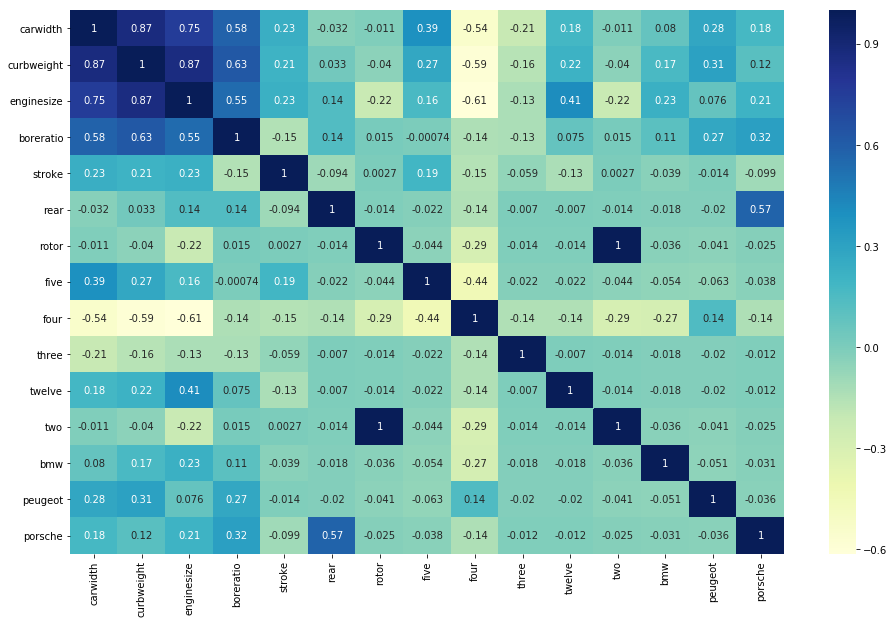

In [59]:
# Let's check the correlation coefficients to see which variables are highly correlated
# we figure out that there is only record for mercury- brand, spfi-fuelsystem and mfi-system 
plt.figure(figsize = (16, 10))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

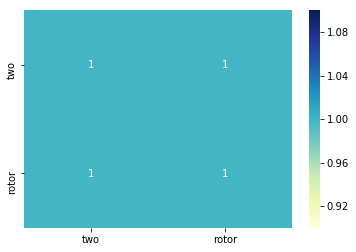

In [60]:
# check the coorelation in between rotor and two
# we figured out that its very high
X_train_with_two_rotor = X_train_rfe[["two","rotor"]]
sns.heatmap(X_train_with_two_rotor.corr(), annot = True, cmap="YlGnBu")
plt.show()

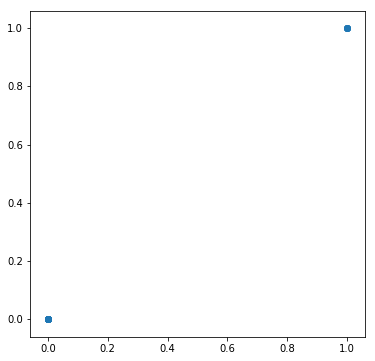

In [61]:
#we observed that `rotor` seems to the correlated to `two` the most
plt.figure(figsize=[6,6])
plt.scatter(X_train_rfe.rotor, X_train_rfe.two)

In [62]:
#lets drop the rotor and two
#remove carwidth and check the accuracy of the model
X_train_rfe = X_train_rfe.drop(["two"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.03e-70
Time:                        14:00:51   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2770      0.038     -7.337      0.0

,Features,VIF
2,enginesize,80.71
1,curbweight,54.10
0,carwidth,41.15
3,boreratio,34.56
4,stroke,30.89
8,four,24.19
6,rotor,3.95
10,twelve,2.81
7,five,2.67
13,porsche,1.93


We figured out that curbweigth, carwidth, enginesize are highly correlated 
There is a possibility of having the multicollinearity effect

In [63]:
#remove carwidth and check the accuracy of the model
X_train_rfe_without_carwidth = X_train_rfe.drop(["carwidth"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_carwidth)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_carwidth.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_carwidth.values, i) for i in range(X_train_rfe_without_carwidth.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.15e-66
Time:                        14:00:52   Log-Likelihood:                 202.04
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     129   BIC:                            -334.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2218      0.040     -5.489      0.0

,Features,VIF
1,enginesize,78.05
0,curbweight,44.75
2,boreratio,34.50
3,stroke,30.68
7,four,23.11
5,rotor,3.78
9,twelve,2.79
6,five,2.22
12,porsche,1.77
11,peugeot,1.61


Accuracy model is still good; however VIF values are still out of acceptable range

In [64]:
#remove curbweigth and check the accuracy of the model
X_train_rfe_without_curbweight = X_train_rfe.drop(["curbweight"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_curbweight)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_curbweight.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_curbweight.values, i) for i in range(X_train_rfe_without_curbweight.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.7
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.25e-67
Time:                        14:00:53   Log-Likelihood:                 204.47
No. Observations:                 143   AIC:                            -380.9
Df Residuals:                     129   BIC:                            -339.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2685      0.041     -6.527      0.0

,Features,VIF
1,enginesize,60.13
2,boreratio,34.28
0,carwidth,34.04
3,stroke,30.58
7,four,24.17
5,rotor,3.75
6,five,2.61
9,twelve,2.59
12,porsche,1.83
4,rear,1.71


Accuracy model is still good; however VIF values are still out of acceptable range

In [65]:
#remove curbweigth & carwidth and check the accuracy of the model
#retain enginesize as cofficient is really high
X_train_rfe_with_enginesize = X_train_rfe.drop(["curbweight","carwidth"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_with_enginesize)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_with_enginesize.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_with_enginesize.values, i) for i in range(X_train_rfe_with_enginesize.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     93.28
Date:                Mon, 27 May 2019   Prob (F-statistic):           9.33e-58
Time:                        14:00:54   Log-Likelihood:                 178.74
No. Observations:                 143   AIC:                            -331.5
Df Residuals:                     130   BIC:                            -293.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1747      0.047     -3.739      0.0

,Features,VIF
0,enginesize,45.18
1,boreratio,34.03
2,stroke,30.52
6,four,22.73
4,rotor,3.31
8,twelve,2.47
5,five,1.90
11,porsche,1.75
3,rear,1.52
7,three,1.23


Accuracy is dropped a bit and still engie size has high VIF

In [66]:
#lets remove enginesize and check the accuracy of the model
X_train_rfe_without_enginesize = X_train_rfe.drop(["enginesize"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_enginesize)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_enginesize.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_enginesize.values, i) for i in range(X_train_rfe_without_enginesize.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.01e-61
Time:                        14:00:55   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1639      0.042     -3.890      0.0

,Features,VIF
1,curbweight,40.31
0,carwidth,39.80
2,boreratio,22.51
3,stroke,16.12
7,four,10.07
12,porsche,1.92
6,five,1.70
4,rear,1.62
11,peugeot,1.42
5,rotor,1.37


Based on the accuracy and VIF, it can be concluded that the model is good to take forward


In [67]:
X_train_rfe= X_train_rfe_without_enginesize

In [68]:
#now the p value of four is 0.866 and hence its not so significant variable
X_train_rfe = X_train_rfe.drop(["four"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.72e-62
Time:                        14:00:57   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1691      0.029     -5.853      0.0

,Features,VIF
0,carwidth,39.28
1,curbweight,23.48
2,boreratio,11.34
3,stroke,8.01
11,porsche,1.80
4,rear,1.61
6,five,1.49
10,peugeot,1.28
8,twelve,1.16
9,bmw,1.13


In [69]:
#now the p value of five is 0.763 and hence its not so significant variable
X_train_rfe = X_train_rfe.drop(["five"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.37e-63
Time:                        14:00:58   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1678      0.028     -5.892      0.0

,Features,VIF
0,carwidth,33.96
1,curbweight,23.47
2,boreratio,9.90
3,stroke,7.65
10,porsche,1.77
4,rear,1.60
9,peugeot,1.24
7,twelve,1.13
8,bmw,1.12
5,rotor,1.04


In [70]:
#now the p value of stroke is 0.478 and coefficient is also negative and hence its not so significant variable
X_train_rfe = X_train_rfe.drop(["stroke"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.72e-64
Time:                        14:00:59   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1828      0.019     -9.527      0.0

,Features,VIF
0,carwidth,25.35
1,curbweight,23.19
2,boreratio,9.79
9,porsche,1.64
3,rear,1.57
8,peugeot,1.18
7,bmw,1.12
6,twelve,1.07
4,rotor,1.04
5,three,1.01


In [71]:
#now the p value of rotor is high so remove the variable and recheck the accuracy
X_train_rfe_without_rotor = X_train_rfe.drop(["rotor"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_rotor)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature vX_train_rfeariables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_rotor.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_rotor.values, i) for i in range(X_train_rfe_without_rotor.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.09e-64
Time:                        14:00:59   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1826      0.019     -9.475      0.0

,Features,VIF
0,carwidth,25.25
1,curbweight,23.05
2,boreratio,9.73
8,porsche,1.64
3,rear,1.57
7,peugeot,1.18
6,bmw,1.12
5,twelve,1.07
4,three,1.01


In [72]:
X_train_rfe = X_train_rfe_without_rotor

In [73]:
#now the p value of twelve is 0.204 and hence its not so significant variable
X_train_rfe_boreratio = X_train_rfe.drop(["boreratio"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_boreratio)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_boreratio.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_boreratio.values, i) for i in range(X_train_rfe_boreratio.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           7.17e-65
Time:                        14:01:01   Log-Likelihood:                 185.90
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     134   BIC:                            -327.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2024      0.017    -11.914      0.0

,Features,VIF
1,curbweight,22.23
0,carwidth,21.24
7,porsche,1.60
2,rear,1.56
6,peugeot,1.18
5,bmw,1.11
4,twelve,1.06
3,three,1.00


In [74]:
X_train_rfe = X_train_rfe_boreratio

In [75]:
#now the p value of twelve is 0.204 and hence its not so significant variable
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature variables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           7.17e-65
Time:                        14:01:02   Log-Likelihood:                 185.90
No. Observations:                 143   AIC:                            -353.8
Df Residuals:                     134   BIC:                            -327.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2024      0.017    -11.914      0.0

,Features,VIF
1,curbweight,22.23
0,carwidth,21.24
7,porsche,1.60
2,rear,1.56
6,peugeot,1.18
5,bmw,1.11
4,twelve,1.06
3,three,1.00


In [76]:
#VIF of carwidth is very high so remove the variable and recheck the accuracy
X_train_rfe_without_carwidth = X_train_rfe.drop(["carwidth"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_carwidth)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature vX_train_rfeariables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_carwidth.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_carwidth.values, i) for i in range(X_train_rfe_without_carwidth.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.97e-60
Time:                        14:01:03   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1449      0.014    -10.087      0.0

,Features,VIF
6,porsche,1.55
1,rear,1.50
0,curbweight,1.33
5,peugeot,1.16
4,bmw,1.09
3,twelve,1.04
2,three,1.00


In [77]:
#VIF of curbweight is very high so remove the variable and recheck the accuracy
X_train_rfe_without_curbweight = X_train_rfe.drop(["curbweight"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_curbweight)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature vX_train_rfeariables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_curbweight.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_curbweight.values, i) for i in range(X_train_rfe_without_curbweight.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     98.29
Date:                Mon, 27 May 2019   Prob (F-statistic):           7.83e-50
Time:                        14:01:04   Log-Likelihood:                 146.20
No. Observations:                 143   AIC:                            -276.4
Df Residuals:                     135   BIC:                            -252.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2355      0.022    -10.744      0.0

,Features,VIF
6,porsche,1.58
1,rear,1.51
0,carwidth,1.27
5,peugeot,1.13
4,bmw,1.06
3,twelve,1.03
2,three,1.00


In [78]:
#VIF of carwidth is very high so remove the variable and recheck the accuracy
X_train_rfe_without_carwidth = X_train_rfe.drop(["carwidth"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_carwidth)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature vX_train_rfeariables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_carwidth.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_carwidth.values, i) for i in range(X_train_rfe_without_carwidth.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.97e-60
Time:                        14:01:04   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1449      0.014    -10.087      0.0

,Features,VIF
6,porsche,1.55
1,rear,1.50
0,curbweight,1.33
5,peugeot,1.16
4,bmw,1.09
3,twelve,1.04
2,three,1.00


We have to drop one of the variable out of carwidth and curbweight.
And when we compare the models after dropping carwidth and curbweight one by one.
After comparing the models, we decide to drop the carwidth

In [79]:
X_train_rfe = X_train_rfe_without_carwidth

In [80]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature vX_train_rfeariables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.97e-60
Time:                        14:01:07   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1449      0.014    -10.087      0.0

,Features,VIF
6,porsche,1.55
1,rear,1.50
0,curbweight,1.33
5,peugeot,1.16
4,bmw,1.09
3,twelve,1.04
2,three,1.00


In [81]:
#now the p value of three is high so remove the variable and recheck the accuracy
X_train_rfe_without_three = X_train_rfe.drop(["three"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_three)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature vX_train_rfeariables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_three.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_three.values, i) for i in range(X_train_rfe_without_three.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.9
Date:                Mon, 27 May 2019   Prob (F-statistic):           8.77e-61
Time:                        14:01:08   Log-Likelihood:                 170.29
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     136   BIC:                            -305.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1397      0.014     -9.807      0.0

,Features,VIF
5,porsche,1.55
1,rear,1.50
0,curbweight,1.33
4,peugeot,1.16
3,bmw,1.09
2,twelve,1.04


In [82]:
X_train_rfe = X_train_rfe_without_three

In [83]:
#now the p value of twelve is high so remove the variable and recheck the accuracy
X_train_rfe_without_twelve = X_train_rfe.drop(["twelve"],1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe_without_twelve)
lm = sm.OLS(y_train,X_train_rfe_lm).fit()   
print(lm.summary())
# create a dataframe that will contain the names of all the feature vX_train_rfeariables and their respective VIFs
# we are doing this exercize on the selected features after eliminating features after performing RFE
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_without_twelve.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_without_twelve.values, i) for i in range(X_train_rfe_without_twelve.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.87e-61
Time:                        14:01:09   Log-Likelihood:                 167.70
No. Observations:                 143   AIC:                            -323.4
Df Residuals:                     137   BIC:                            -305.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1454      0.014    -10.224      0.0

,Features,VIF
4,porsche,1.55
1,rear,1.50
0,curbweight,1.28
3,peugeot,1.16
2,bmw,1.08


In [84]:
X_train_rfe = X_train_rfe_without_twelve
X_train_lm = X_train_rfe_lm

Now model seems to be pretty much fine.
Model understands data variance nicely as adjusted R square is 0.921
Overall model accuracy is high as Prob (F-statistic) is 4.02e-74 

## Step 7 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [85]:
y_train_price = lm.predict(X_train_rfe_lm)

In [86]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

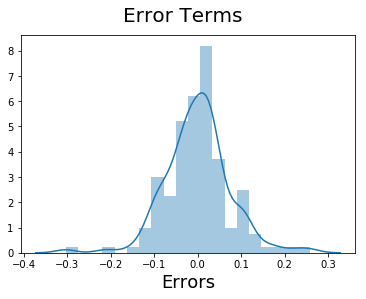

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [88]:
df_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.564516,99.295161,175.508065,66.064516,54.124194,2592.596774,131.403226,3.381290,3.267742,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,1.358620,0.499868,6.172983,11.681726,1.985282,2.438670,462.719100,43.147273,0.287889,0.318261,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,-2.000000,0.000000,86.600000,144.600000,62.500000,49.400000,1819.000000,79.000000,2.540000,2.070000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,95.700000,169.350000,64.600000,52.150000,2275.000000,108.000000,3.190000,3.150000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,97.850000,174.800000,65.600000,54.450000,2535.000000,121.000000,3.390000,3.350000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,103.150000,185.375000,66.500000,55.700000,2944.250000,144.750000,3.620000,3.460000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,120.900000,208.100000,72.000000,59.800000,3900.000000,308.000000,3.800000,3.900000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
df_test[numeric_features] = scaler.transform(df_test[numeric_features])

In [90]:
important_indepedent_variables =  X_train_rfe.columns

In [91]:
X_test = df_test[important_indepedent_variables]

#### Dividing into X_test and y_test

In [92]:
y_test = df_test.pop('price')


In [93]:
# Now let's use our model to make predictions.

# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [94]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

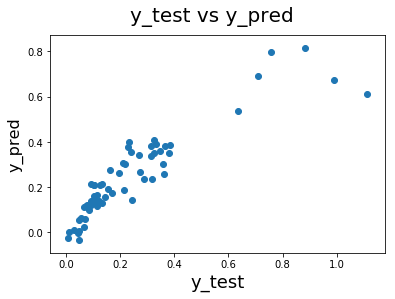

In [95]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [97]:
df1=pd.DataFrame(y_pred)
df2=pd.DataFrame(y_test)
df_concat = pd.concat([df1, df2], axis=1)
df_concat

,0,price
160,0.060275,0.072382
186,0.121705,0.093295
59,0.159039,0.102964
165,0.118311,0.115479
140,0.109826,0.068652
64,0.172614,0.169268
198,0.383039,0.367489
75,0.337221,0.314529
172,0.359281,0.346741
104,0.391863,0.333757



We can see that the equation of our best fitted line is:
const         -0.1454      0.014    -10.224      0.000      -0.174      -0.117
curbweight     0.8750      0.033     26.567      0.000       0.810       0.940
rear           0.3094      0.094      3.299      0.001       0.124       0.495
bmw            0.2441      0.033      7.485      0.000       0.180       0.309
peugeot       -0.1584      0.030     -5.357      0.000      -0.217      -0.100
porsche        0.2043      0.055      3.709      0.000       0.095       0.313

$ price = 0.8750 * curbweight + 0.3094 * rear + 0.2441 * bmw + 0.2043 * porsche - 0.1584 * peugeot-0.1454 


In [98]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8157647906591778